In [1]:
import pandas as pd
import numpy as np
import yfinance as yf
import random
from matplotlib import pyplot as plt
plt.style.use("seaborn")
import seaborn

In [2]:
giorni_anno=253
df=yf.download("^SP500TR")["Adj Close"].pct_change(giorni_anno).dropna()

[*********************100%***********************]  1 of 1 completed


In [3]:
df

Date
1989-01-03    0.115733
1989-01-04    0.120648
1989-01-05    0.121916
1989-01-06    0.115156
1989-01-09    0.197495
                ...   
2023-02-13   -0.082724
2023-02-14   -0.066069
2023-02-15   -0.045167
2023-02-16   -0.054684
2023-02-17   -0.071866
Name: Adj Close, Length: 8600, dtype: float64

In [4]:
primo_estratto=random.randint(0,len(df)-3*giorni_anno-1)
secondo_estratto=primo_estratto+giorni_anno
terzo_estratto=secondo_estratto+giorni_anno
print(df.index[primo_estratto],"->",round(df[primo_estratto]*100),"%")
print(df.index[secondo_estratto],"->",round(df[secondo_estratto]*100),"%")
print(df.index[terzo_estratto],"->",round(df[terzo_estratto]*100),"%")

2017-04-17 00:00:00 -> 15 %
2018-04-18 00:00:00 -> 18 %
2019-04-22 00:00:00 -> 10 %


In [5]:
quante_simulazioni=100
upper=len(df)-3*giorni_anno-1
m=np.zeros((100,quante_simulazioni))
m[0,:]=1
for c in range(quante_simulazioni):
    for t in range(1,100,3):
        e1=random.randint(0,upper)
        e2=e1+giorni_anno
        e3=e2+giorni_anno
        # print(t,c)
        m[t,c]=m[t-1,c]*(1+df[e1])
        m[t+1,c]=m[t,c]*(1+df[e2])
        m[t+2,c]=m[t+1,c]*(1+df[e3])

In [6]:
m

array([[1.00000000e+00, 1.00000000e+00, 1.00000000e+00, ...,
        1.00000000e+00, 1.00000000e+00, 1.00000000e+00],
       [1.01926326e+00, 1.29106843e+00, 9.49771221e-01, ...,
        1.18834211e+00, 1.09515747e+00, 1.16545661e+00],
       [1.28340698e+00, 1.47776828e+00, 5.87587816e-01, ...,
        1.25608997e+00, 1.15303256e+00, 1.42010471e+00],
       ...,
       [1.15959908e+03, 3.98818498e+04, 4.61484869e+04, ...,
        4.91272908e+04, 9.95476168e+04, 3.42152920e+03],
       [1.36524244e+03, 4.55500883e+04, 5.54530957e+04, ...,
        5.69985946e+04, 1.18212454e+05, 3.60455420e+03],
       [1.42968155e+03, 4.89033196e+04, 5.32277526e+04, ...,
        5.98705177e+04, 1.40423425e+05, 4.24298954e+03]])

<AxesSubplot:>

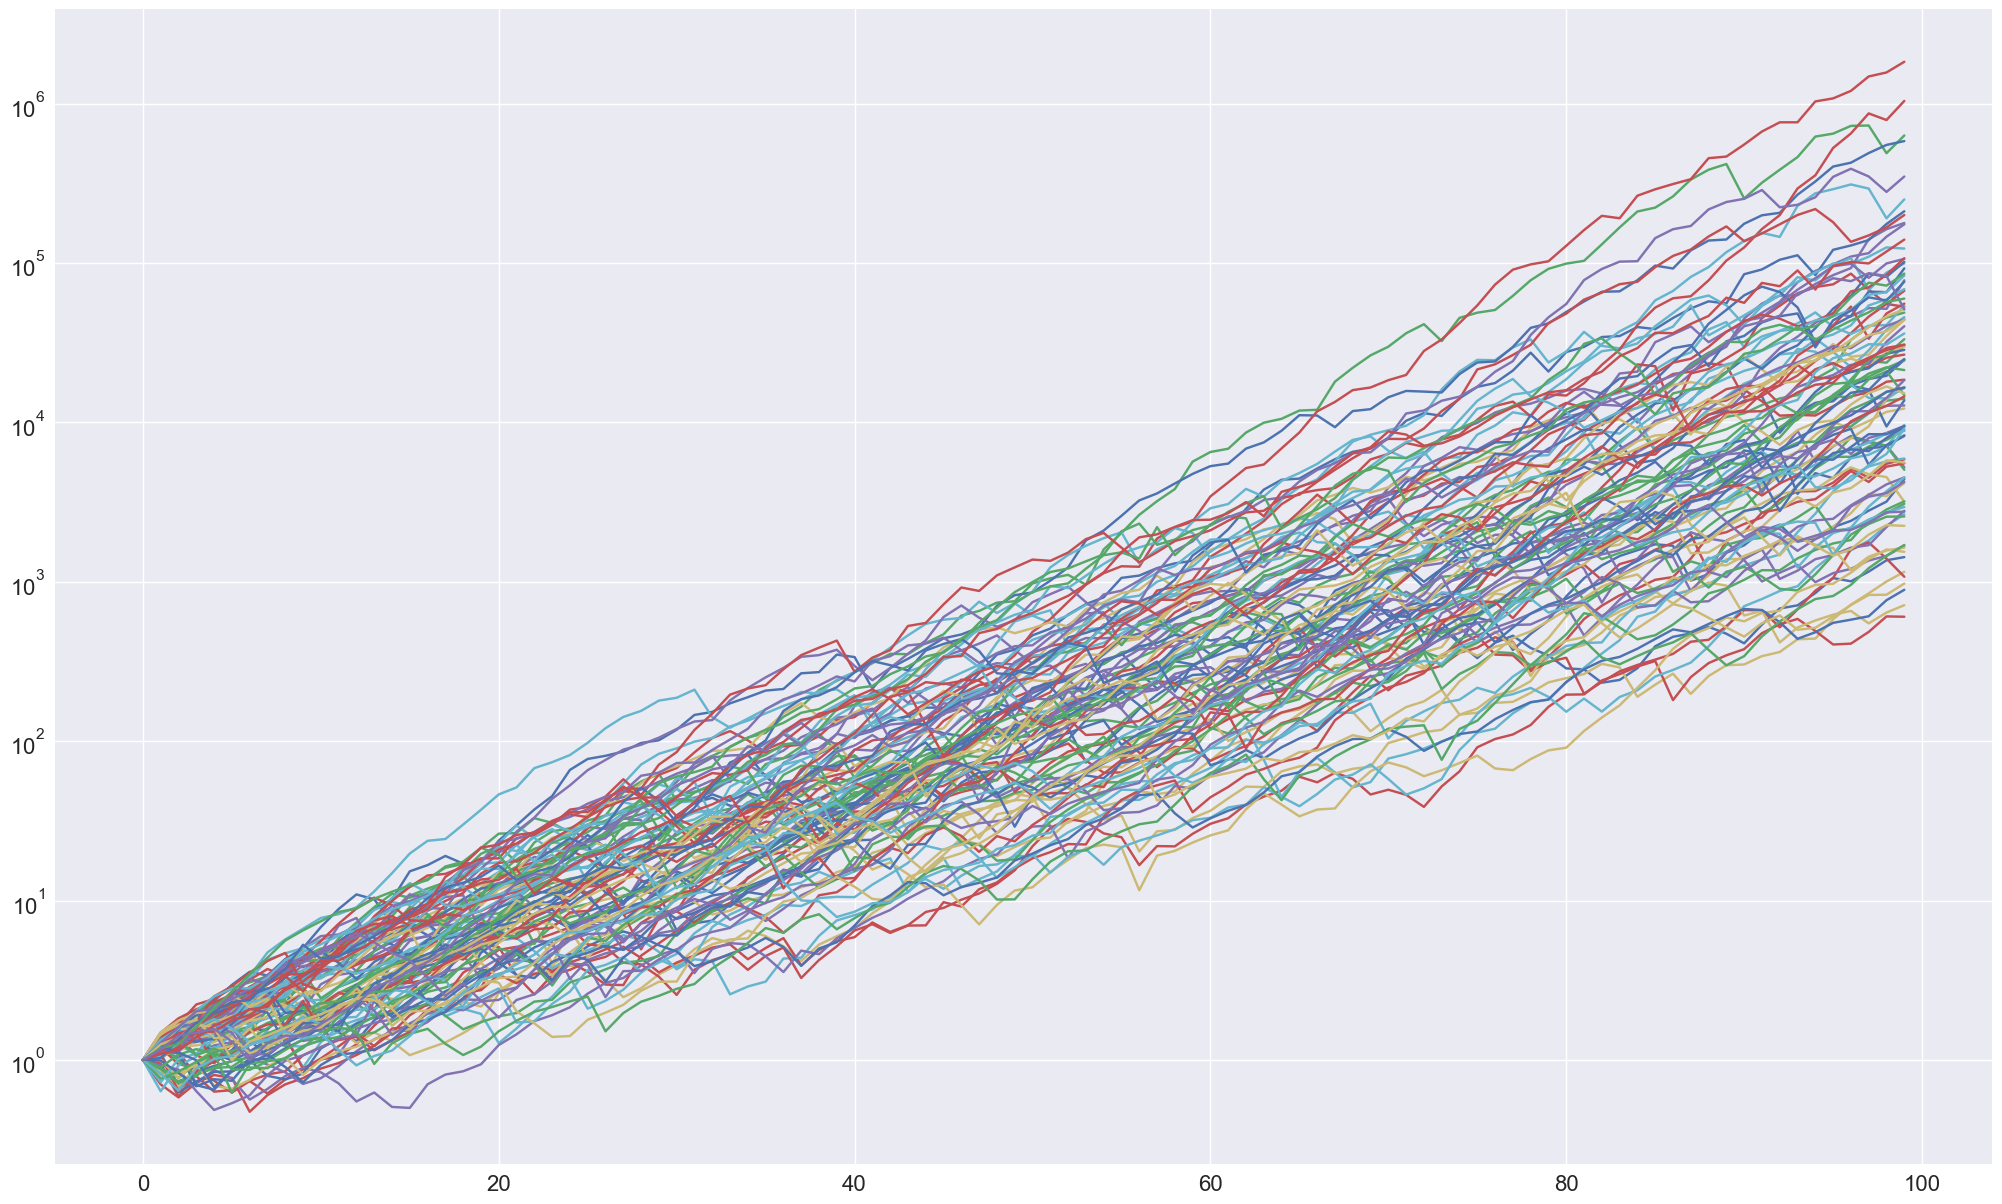

In [7]:
pd.DataFrame(m).plot(legend=None,logy=True,fontsize=16,figsize=(25,15))

In [8]:
quante_simulazioni=10000
upper=len(df)-3*giorni_anno-1
md=np.zeros((100,quante_simulazioni))
md[0,:]=1
m=np.zeros((100,quante_simulazioni))
m[0,:]=1
for c in range(quante_simulazioni):
    for t in range(1,100,3):
        e1=random.randint(0,upper)
        e2=e1+giorni_anno
        e3=e2+giorni_anno
        # print(t,c)
        md[t,c]=1+df[e1]
        md[t+1,c]=1+df[e2]
        md[t+2,c]=1+df[e3]
        m[t,c]=m[t-1,c]*(1+df[e1])
        m[t+1,c]=m[t,c]*(1+df[e2])
        m[t+2,c]=m[t+1,c]*(1+df[e3])

# Iniziamo finalmente l'analisi

In [9]:
capitale=700000
prelievo=2000*13
inflazione=0.03
bollo=0.002
anni_rendita=51 # per quanti anni resti in pensione, massimo 99!

ATTENZIONE. Rispetto al video ho aggiunto:
1. imposta di bollo
2. la tassa sulla tassa, dato che sto usando i soldi investiti per pagare le tasse

In [13]:
prelievi=np.zeros((100,))
prelievi[0]=prelievo
for t in range(1,100):
    prelievi[t]=prelievo*(1+inflazione)**t

fire=np.zeros((100,quante_simulazioni))
fire[0,:]=capitale-prelievi[0]
for t in range(1,100):
    tassa=np.zeros((quante_simulazioni,))
    tassa=(m[t,:]>m[0,:])*(prelievi[t]-prelievi[t]/m[t,:]*m[0,:])*0.26/(1-0.26)
    tassa+=fire[t-1,:]*bollo/(1-(m[t,:]>m[0,:])*0.26)
    fire[t,:]=fire[t-1,:]*md[t,:]-prelievi[t]-tassa[:]

In [14]:
fire

array([[6.74000000e+05, 6.74000000e+05, 6.74000000e+05, ...,
        6.74000000e+05, 6.74000000e+05, 6.74000000e+05],
       [8.52939455e+05, 9.01829091e+05, 8.97317991e+05, ...,
        8.59476884e+05, 8.01006404e+05, 7.05394234e+05],
       [1.00727887e+06, 9.26674728e+05, 1.00236704e+06, ...,
        7.97985855e+05, 6.63301094e+05, 7.29239518e+05],
       ...,
       [3.24856861e+10, 3.60492746e+09, 2.98051470e+10, ...,
        2.69981806e+09, 4.78115519e+08, 2.34821559e+09],
       [4.21495190e+10, 4.22774761e+09, 3.25506274e+10, ...,
        2.97711298e+09, 5.23331248e+08, 1.87037169e+09],
       [4.96875278e+10, 5.23698582e+09, 3.64007447e+10, ...,
        3.82002708e+09, 5.76321412e+08, 2.11551184e+09]])

In [15]:
pd.Series(fire[anni_rendita,:]>=0).value_counts()/quante_simulazioni*100

True     79.36
False    20.64
dtype: float64

In [16]:
summaryTable=pd.DataFrame(np.zeros((50,20)),columns=list(range(100000,2000001,100000)),index=list(range(1,51)))

In [19]:
for c in range(100000,2000001,100000):
    fire[0,:]=c
    for t in range(1,100):
        tassa=np.zeros((quante_simulazioni,))
        tassa=(m[t,:]>m[0,:])*(prelievi[t]-prelievi[t]/m[t,:]*m[0,:])*0.26/(1-0.26)
        tassa+=fire[t-1,:]*bollo/(1-(m[t,:]>m[0,:])*0.26)
        fire[t,:]=fire[t-1,:]*md[t,:]-prelievi[t]-tassa[:]
    
    for a in range(1,51):
        summaryTable.loc[[a],[c]]=round((fire[a,:]>=0).mean(),2)
        

<AxesSubplot:>

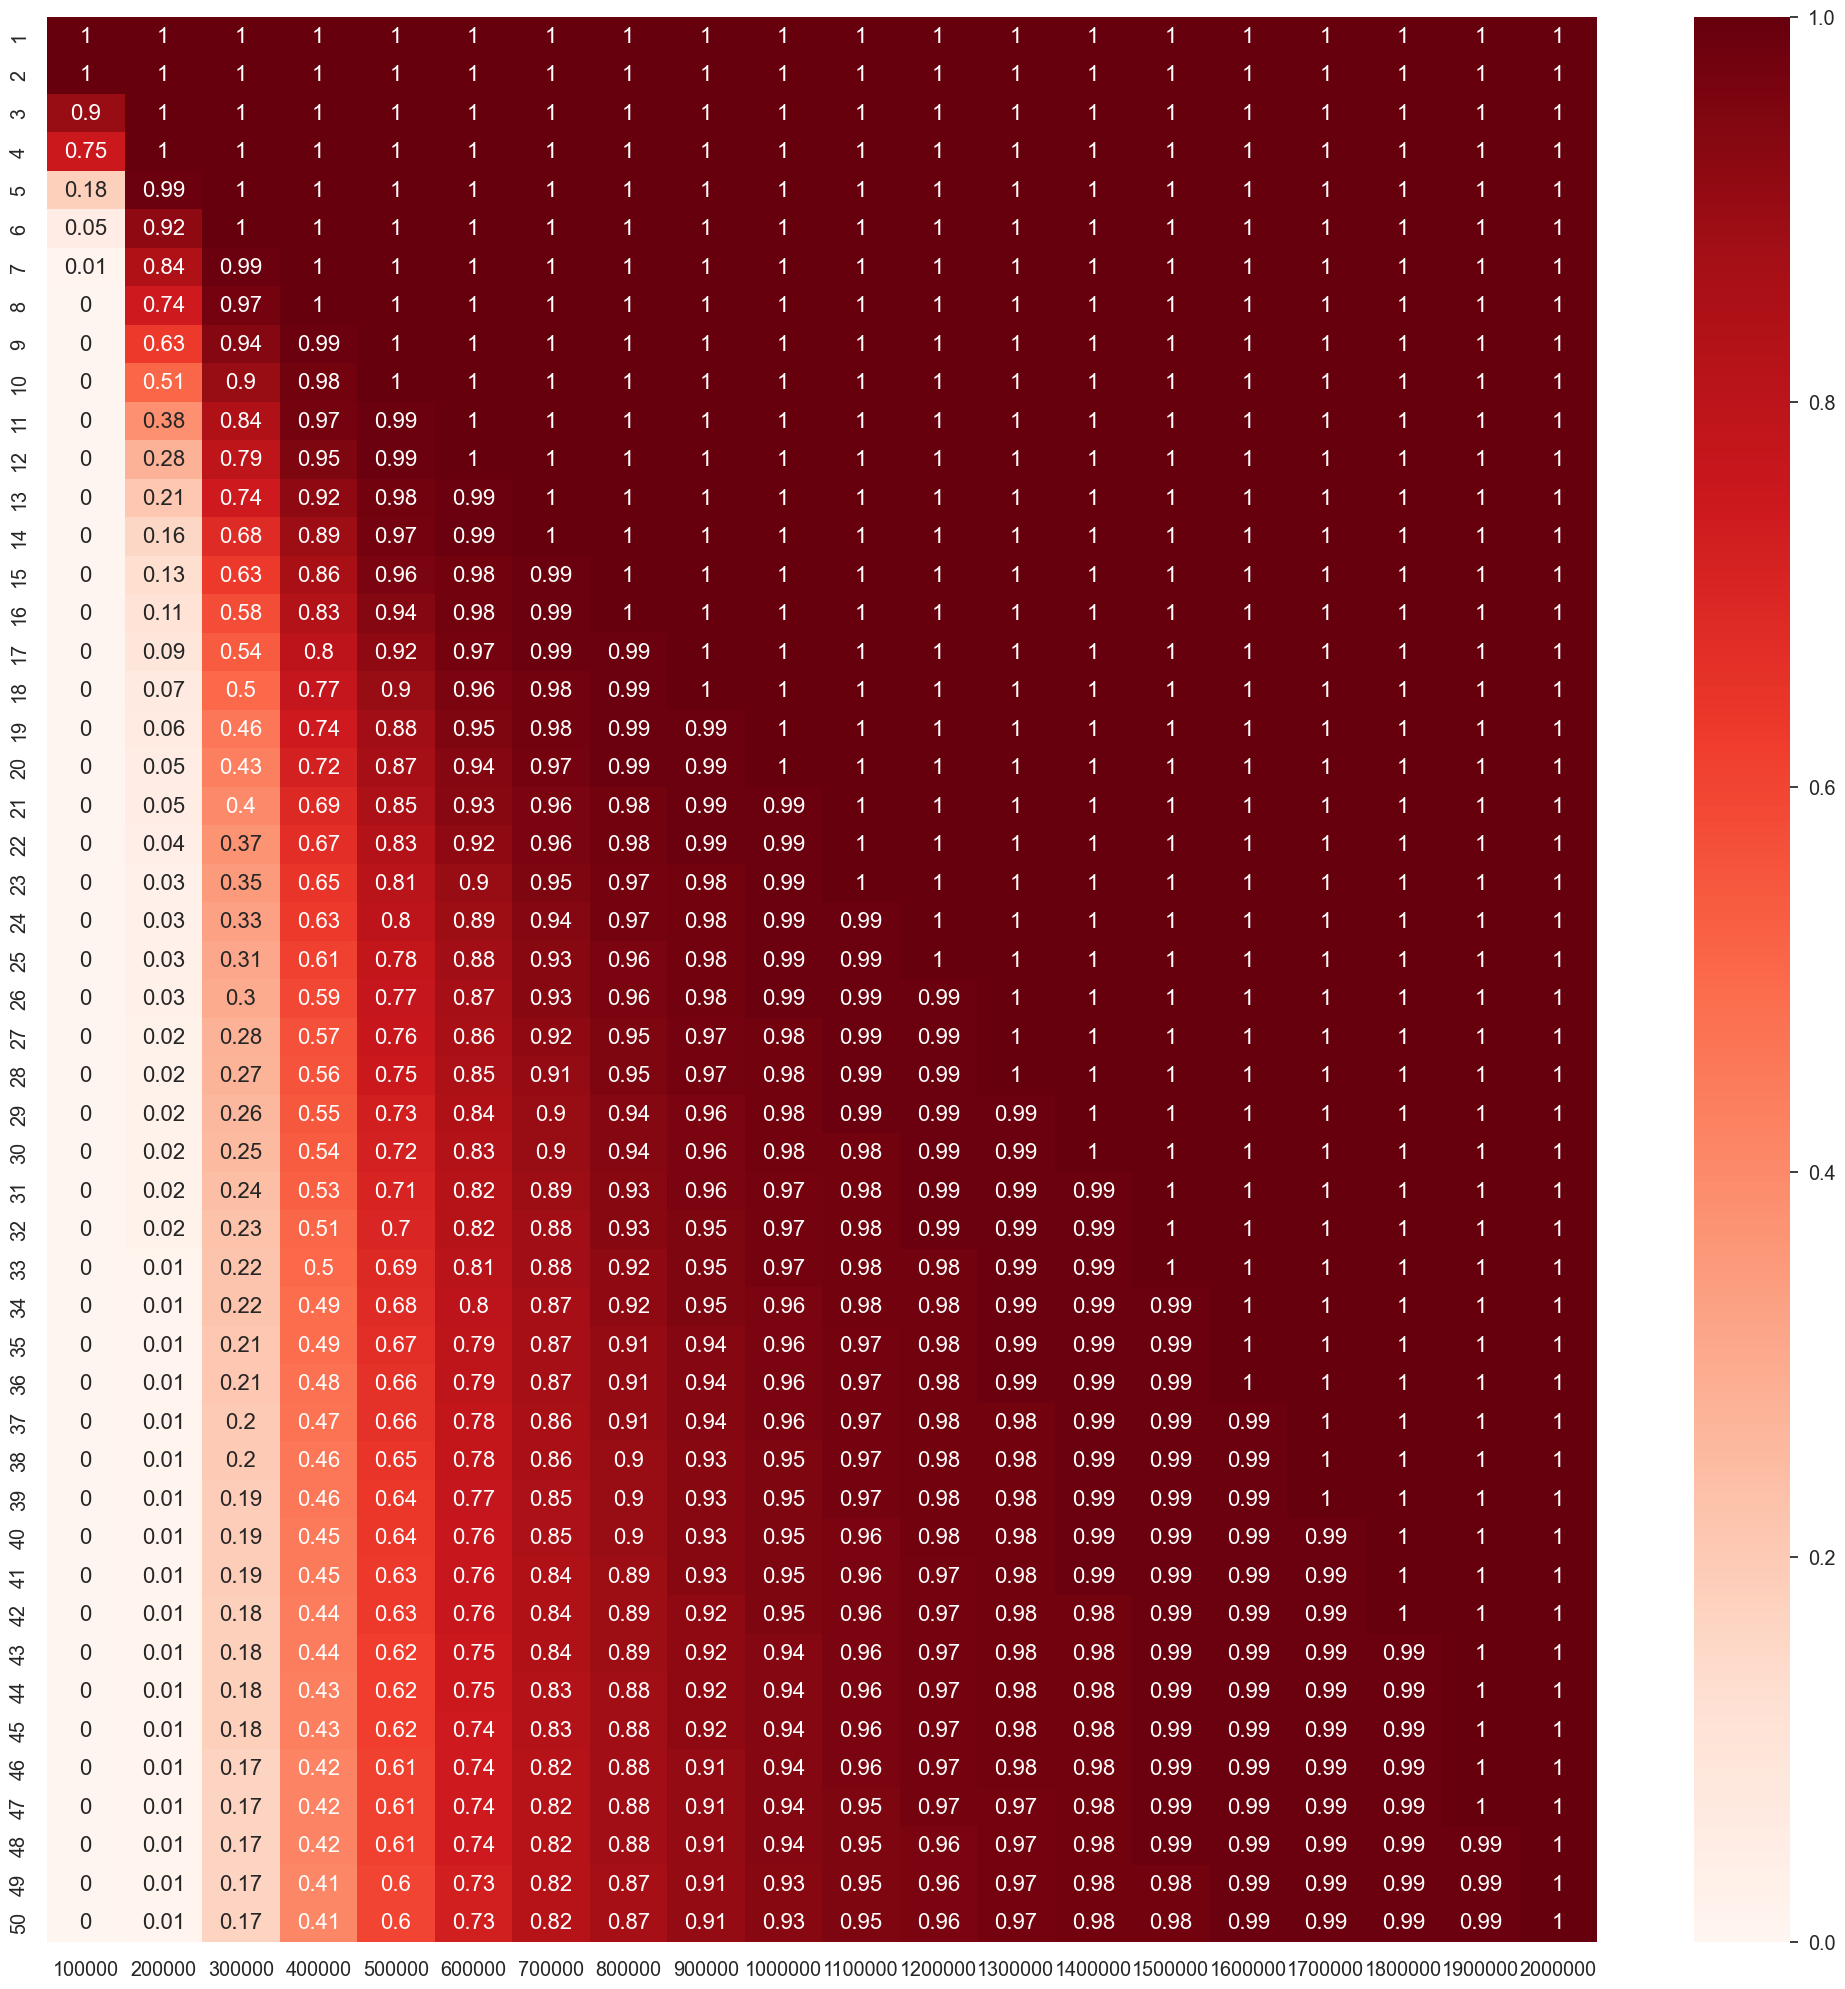

In [20]:
plt.figure(figsize=(25,25))
seaborn.set(font_scale=1.3)
seaborn.heatmap(summaryTable,cmap="Reds", annot=True, annot_kws={"size":16})

# E inseriamo anche la pensione

In [21]:
capitale=700000
prelievo=2000*13
inflazione=0.03
bollo=0.002
anni_rendita=20 # la somma dei due anni_rendita massimo 99
prelievo2=800*13
anni_rendita2=30 # la somma dei due anni_rendita massimo 99

In [22]:
prelievi=np.zeros((100,))
prelievi[0]=prelievo
for t in range(1,anni_rendita):
    prelievi[t]=prelievo*(1+inflazione)**t
for t in range(anni_rendita,100):
    prelievi[t]=prelievo2*(1+inflazione)**t

fire=np.zeros((100,quante_simulazioni))
fire[0,:]=capitale
for t in range(1,100):
    tassa=np.zeros((quante_simulazioni,))
    tassa=(m[t,:]>m[0,:])*(prelievi[t]-prelievi[t]/m[t,:]*m[0,:])*0.26/(1-0.26)
    tassa+=fire[t-1,:]*bollo/(1-(m[t,:]>m[0,:])*0.26)
    fire[t,:]=fire[t-1,:]*md[t,:]-prelievi[t]-tassa[:]

In [23]:
fire

array([[7.00000000e+05, 7.00000000e+05, 7.00000000e+05, ...,
        7.00000000e+05, 7.00000000e+05, 7.00000000e+05],
       [8.86961375e+05, 9.37751577e+05, 9.33065175e+05, ...,
        8.93753039e+05, 8.33007530e+05, 7.33668366e+05],
       [1.04870228e+06, 9.64809639e+05, 1.04354135e+06, ...,
        8.30993291e+05, 6.90927449e+05, 7.59632859e+05],
       ...,
       [4.12870044e+10, 5.59477527e+09, 3.23236474e+10, ...,
        4.95522356e+09, 1.35026009e+09, 2.67751590e+09],
       [5.35696053e+10, 6.56211289e+09, 3.53015535e+10, ...,
        5.46508194e+09, 1.47949804e+09, 2.13313304e+09],
       [6.31505503e+10, 8.12936076e+09, 3.94775015e+10, ...,
        7.01335934e+09, 1.63089645e+09, 2.41319741e+09]])

In [24]:
pd.Series(fire[anni_rendita+anni_rendita2,:]>=0).value_counts()/quante_simulazioni*100

True     91.79
False     8.21
dtype: float64

In [25]:
summaryTable=pd.DataFrame(np.zeros((50,20)),columns=list(range(100000,2000001,100000)),index=list(range(1,51)))

In [27]:
for c in range(100000,2000001,100000):
    fire[0,:]=c
    for t in range(1,100):
        tassa=np.zeros((quante_simulazioni,))
        tassa=(m[t,:]>m[0,:])*(prelievi[t]-prelievi[t]/m[t,:]*m[0,:])*0.26/(1-0.26)
        tassa+=fire[t-1,:]*bollo/(1-(m[t,:]>m[0,:])*0.26)
        fire[t,:]=fire[t-1,:]*md[t,:]-prelievi[t]-tassa[:]
    
    for a in range(1,51):
        summaryTable.loc[[a],[c]]=round((fire[a,:]>=0).mean(),2)
        

<AxesSubplot:>

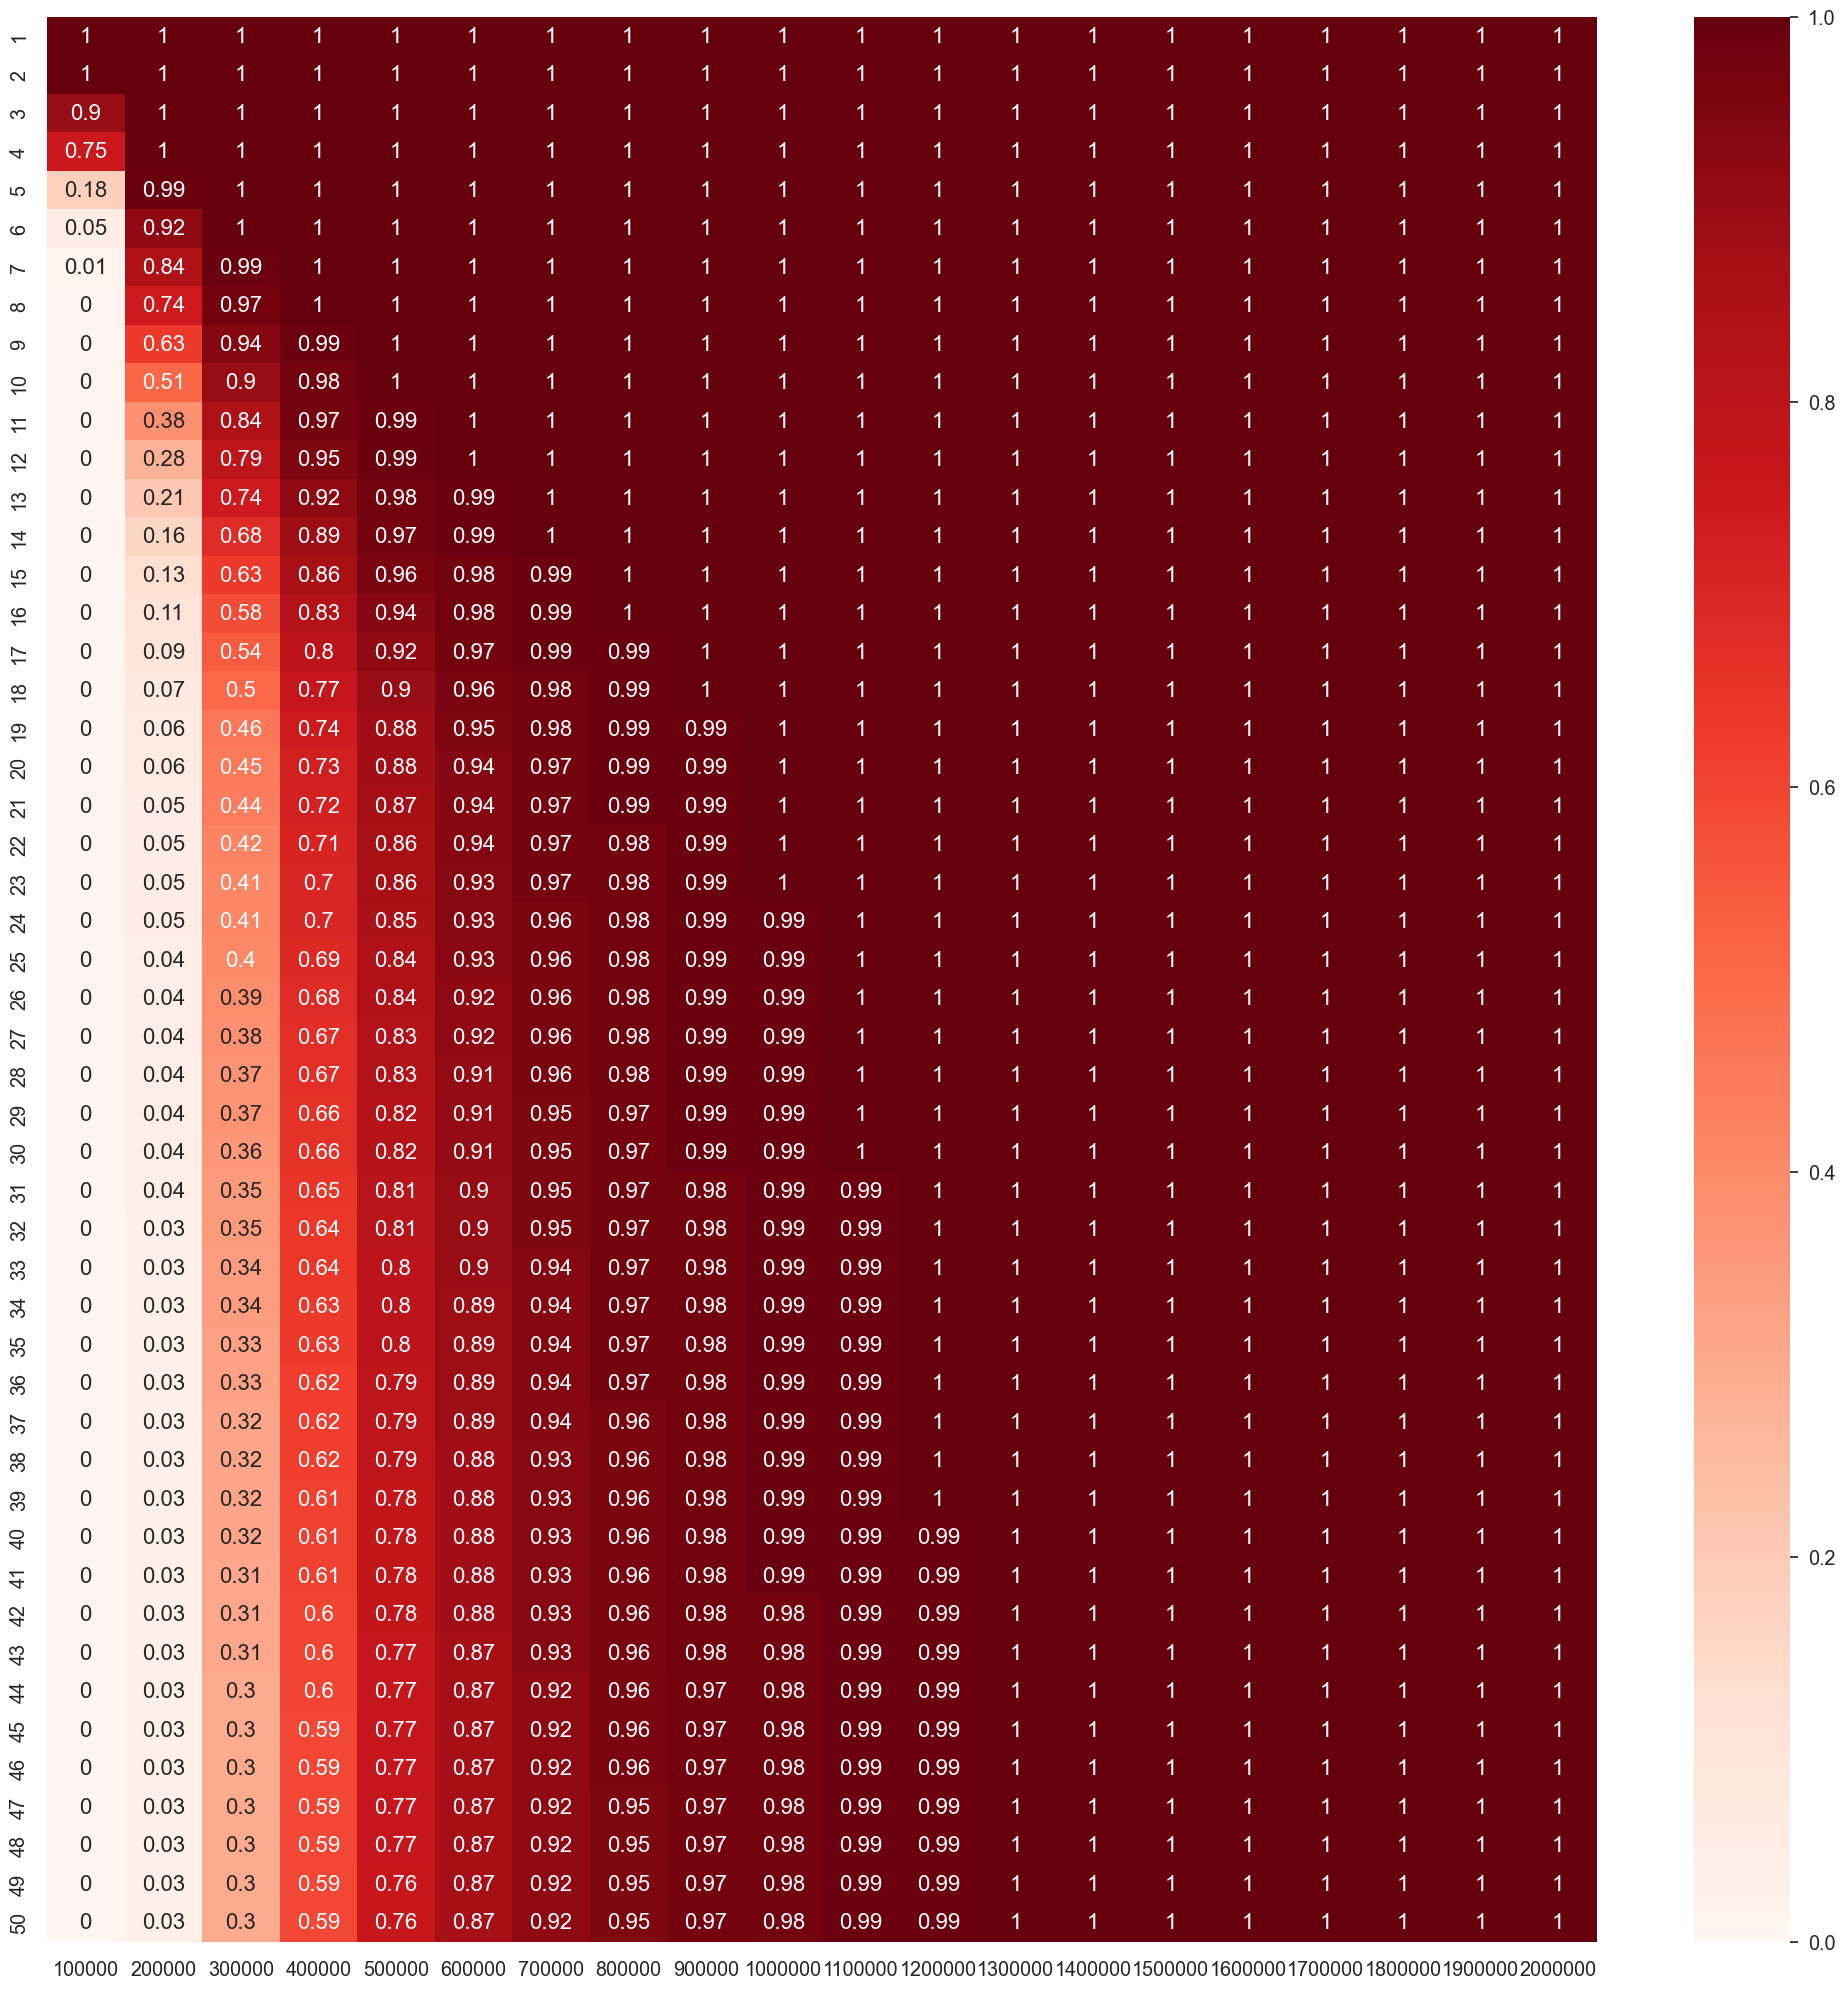

In [28]:
plt.figure(figsize=(25,25))
seaborn.set(font_scale=1.3)
seaborn.heatmap(summaryTable,cmap="Reds", annot=True, annot_kws={"size":16})